# Theory

In [1]:
import numpy as np

from scipy.optimize import minimize

import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("darkgrid")

from src.callback import Simulator

# Maximum Likelihood Estimation in one dimension

## Generating a sample

The probability density function of the univariate Gaussian is given by:

$$f(x | \mu, \sigma^{2}) = \frac{1}{\sqrt{2\pi \sigma^{2}}}e^{-\frac{1}{2\sigma^{2}}(x - \mu)^{2}}$$

[-4.   -3.99 -3.98 ...  9.97  9.98  9.99]
Shape: (500,)


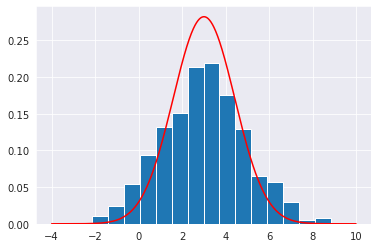

In [3]:
# set the random seed
rng = np.random.default_rng(42)
# generate a sample of normally distributed random variables with mean mu and variance var
mu = 3
var = 2
# generate a random sample using the numpy function
sample = rng.normal(mu, var, 500)

def pdf(x, mu, var):
    """
        Return a vector (shape of x) of the probabilities
        of the values of x
    """
    return 1 / (np.sqrt(2*np.pi*var)) * np.exp(-1/(2*var)*(x - mu)**2)

xx = np.arange(-4, 10, 0.01)

print(xx)
probs = pdf(xx, mu, var)

print(f"Shape: {sample.shape}")

plt.hist(sample, bins=15, density=True);
plt.plot(xx, probs, c='red')

## Maximum Likelihood Estimation

Here we minimise the likelihood function for the univariate Gaussian pdf. This allows us to find the best-fitting parameters.

The log-likelihood of the univariate Gaussian is given by:

$$\log \mathcal{L}(\mu, \sigma^{2}| \vec{x}) = -\frac{n}{2} \log (2\pi) - \frac{n}{2} \log \sigma^{2} - \frac{1}{2\sigma^{2}}\sum_{i = 1}^{n} (x_{i} - \mu)^{2}$$

and hence we want to minimise

$$\hat{\mu} = -\text{argmin}_{\mu} \log \mathcal{L}(\mu, \sigma^{2} | \vec{x})$$

In [5]:
# define the univariate Gaussian likelihood function
def likelihood(params, x):
    mu = params
    sigma = 2
    n = len(x)
    L = (n/2)*np.log(2*np.pi)+(n/2)*np.log(sigma**2)+(1/(2*sigma**2))*sum((x-mu)**2)
    return L

## Evaluating the likelihood function

Evaluating the likelihood function over a range of values, we can geometrically approximate the MLE to be zero.

Text(0.5, 0, 'Mean value: $\\mu$')

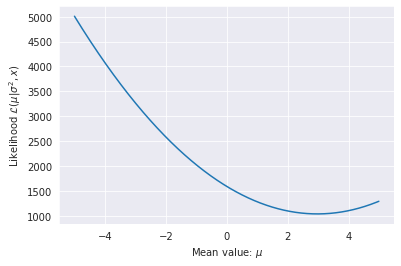

In [6]:
# range of mu values to test for maximum likelihood
mu = np.arange(-5, 5, 0.01)
# list for storing the likelihood values for each mu value
likelihood_values = []

# loop through all values of mu and append the likelihood value output to likelihood_values
for val in mu:
    likelihood_values.append(likelihood(val, sample))
     
# plot the likelihood values
plt.plot(mu, likelihood_values)
plt.ylabel("Likelihood $\mathcal{L}(\mu | \sigma^{2}, x)$")
plt.xlabel("Mean value: $\mu$")

## Minimising the likelihood function using scipy.optimize.minimize

Choose -4 as our initial guess for $\mu$.

As we can see in the plot above, $\text{MLE}_{\mu} \approx 3$, so we should see a clear path from left to right across the curve.

In [7]:
# choose initial guess to be -4
initial_guess = -4

# instantiate the simulator class
lik_sim = Simulator(likelihood)

# minimise the -log(L) function using the wrapper class Simulator
lik_model = minimize(lik_sim.simulate, x0=initial_guess,
                     args=(sample),
                     method="Nelder-Mead",
                     tol=1e-6,
                     options={"disp": True})

lik_model.x

Optimization terminated successfully.
         Current function value: 1035.950498
         Iterations: 27
         Function evaluations: 54


array([2.97374802])

In [9]:
test = np.array((lik_sim.decreasing_list_calls_inp, lik_sim.decreasing_list_calls_res))

test

array([[-4.00000000e+00, -3.80000000e+00, -3.60000000e+00,
        -3.20000000e+00, -2.80000000e+00, -2.00000000e+00,
        -1.20000000e+00,  4.00000000e-01,  2.00000000e+00,
         3.60000000e+00,  2.80000000e+00,  3.00000000e+00,
         2.95000000e+00,  2.97500000e+00,  2.97343750e+00,
         2.97382813e+00,  2.97373047e+00,  2.97375488e+00,
         2.97374268e+00,  2.97374878e+00,  2.97374725e+00,
         2.97374802e+00],
       [ 4.07552281e+03,  3.90367912e+03,  3.73683542e+03,
         3.41814804e+03,  3.11946065e+03,  2.58208588e+03,
         2.12471111e+03,  1.44996157e+03,  1.09521203e+03,
         1.06046249e+03,  1.03783726e+03,  1.03599357e+03,
         1.03598575e+03,  1.03595060e+03,  1.03595050e+03,
         1.03595050e+03,  1.03595050e+03,  1.03595050e+03,
         1.03595050e+03,  1.03595050e+03,  1.03595050e+03,
         1.03595050e+03]])

Text(0.5, 0, 'Mean value: $\\mu$')

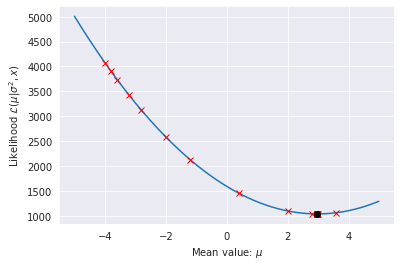

In [12]:
mu = np.arange(-5, 5, 0.01)
likelihood_values = []

for val in mu:
    likelihood_values.append(likelihood(val, sample))
     
plt.plot(mu, likelihood_values)
plt.plot(test[0], test[1], 'rx')
plt.plot(lik_model.x, lik_model.fun, 'ko')

plt.ylabel("Likelihood $\mathcal{L}(\mu | \sigma^{2}, x)$")
plt.xlabel("Mean value: $\mu$")

## Setting $\mu$ to be a function of some parameters $a$, $b$

Let $\mu(a, b) = ax^{2} + bx^{2}$

In [65]:
def model(params, x):
    x, y = params
    return ((x + 2*y - 7)**2 + (2*x + y - 5)**2)

In [66]:
# define the univariate Gaussian likelihood
def likelihood(params, x):
    mu = model(params, x)
    sigma = 2
    n = len(x)
    L = (n/2)*np.log(2*np.pi)+(n/2)*np.log(sigma**2)+(1/(2*sigma**2))*sum((x-mu)**2)
    return L

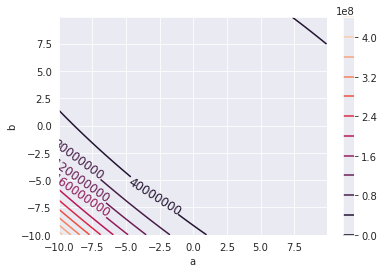

In [67]:
a = np.arange(-10, 10, .1)
b = np.arange(-10, 10, .1)

aa, bb = np.meshgrid(a, b, indexing='ij')

values = np.array((aa, bb)).T.reshape(-1, 2)

likelihood_values = np.zeros(values.shape[0])

for idx, val in enumerate(values):
    likelihood_values[idx] = likelihood(val, sample)
    
likelihood_values

contours = plt.contour(aa, bb, likelihood_values.reshape(aa.shape), 10)
plt.clabel(contours, inline=1, fontsize=12)
plt.ylabel("b")
plt.xlabel("a")
plt.colorbar()

In [62]:
likelihood_sim.list_calls_inp

NameError: name 'likelihood_sim' is not defined

IndexError: index 1 is out of bounds for axis 0 with size 1

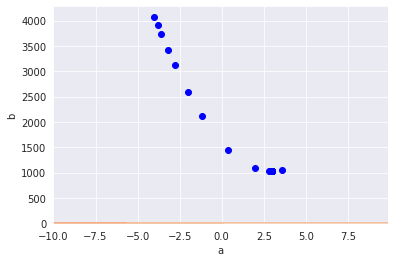

In [46]:
plt.contour(aa, bb, likelihood_values.reshape(aa.shape), 20)
plt.ylabel("b")
plt.xlabel("a")
plt.plot(test[0], test[1], 'bo')
plt.plot(lik_model.x[0], lik_model.x[1], 'ko', label=f"mu(a={lik_model.x[0]:.2f}, b={lik_model.x[1]:.2f})")
plt.legend()
plt.colorbar()

In [50]:
initial_guess = rng.random(2)

print(initial_guess)

def callback_function(Xi):
    global nfev
    print(f"{nfev}, {Xi[0]}, {Xi[1]}")
    Nfeval += 1

lik_model = minimize(likelihood, x0=initial_guess,
                     args=(sample),
                     method="Nelder-Mead",
                     tol=1e-6,
                     callback=callback_function,
                     options={"disp": True})

lik_model.x

[0.37226157 0.1536129 ]


NameError: name 'nfev' is not defined

In [ ]:
plt.contour(aa, bb, likelihood_values.reshape(aa.shape), 20)
plt.ylabel("b")
plt.xlabel("a")
plt.plot(lik_model.x[0], lik_model.x[1], 'ko', label=f"mu(a={lik_model.x[0]:.2f}, b={lik_model.x[1]:.2f})")
plt.legend()
plt.colorbar()

In [ ]:
test = np.array([])

print(test)

test = np.append(test, 3)

print(test)

In [ ]:
# class Simulator:
#     def __init__(self, objective):
#         self.objective = objective # define objective function
#         self.call_count = 0 # how many times the objective function has been called
#         self.callback_count = 0 # number of times callback has been called, also measures iteration count
#         self.list_calls_inp = [] # parameter inputs for all calls
#         self.list_calls_res = [] # loss value output for all calls
#         self.decreasing_list_calls_inp = [] # parameter inputs that resulted in decrease
#         self.decreasing_list_calls_res = [] # loss value outputs that resulted in decrease
#         self.list_callback_inp = [] # only appends inputs on callback, as such they correspond to the iterations
#         self.list_callback_res = [] # only appends results on callback, as such they correspond to the iterations

#     def simulate(self, x, *args):
#         """
#             Executes the simulation.
#             Returns the result and updates the lists for the callback.
#             Pass to the optimiser as the objective function.
#         """
#         result = self.objective(x, *args) # evaluate the objective function
#         if not self.call_count: # first call is stored in all lists
#             self.decreasing_list_calls_inp.append(x[0])
#             self.decreasing_list_calls_res.append(result)
#             self.list_callback_inp.append(x)
#             self.list_callback_res.append(result)
#         elif result < self.decreasing_list_calls_res[-1]:
#             self.decreasing_list_calls_inp.append(x[0])
#             self.decreasing_list_calls_res.append(result)
#         self.list_calls_inp.append(x[0])
#         self.list_calls_res.append(result)
#         self.call_count += 1
#         return result
    
#     def callback(self, xk, *_):
#         s1 = ""
#         xk = np.atleast_1d(xk)
#         for i, x in reversed(list(enumerate(self.list_calls_inp))):
#             x = np.atleast_1d(x)
#             if np.allclose(x, xk):
#                 break

#         for comp in xk:
#             s1 += f"{comp:10.5e}\t"
#         s1 += f"{self.list_calls_res[i]:10.5e}"

#         self.list_callback_inp.append(xk)
#         self.list_callback_res.append(self.list_calls_res[i])

#         if not self.callback_count:
#             s0 = ""
#             for j, _ in enumerate(xk):
#                 tmp = f"Comp-{j+1}"
#                 s0 += f"{tmp:10s}\t"
#             s0 += "Objective"
#             print(s0)
#         print(s1)
#         self.callback_count += 1

        
# likelihood_sim = Simulator(likelihood)
# minimize(likelihood_sim.simulate,
#          x0=initial_guess,
#          args=sample,
#          method="Nelder-Mead",
#          options={"disp": True})